In [24]:
subj_datafile = 'alexH.csv'

In [25]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt

df_trials = pd.read_csv(subj_datafile)

df_trials.head()

,row_id,block,trial,ori_left,ori_right,coherence_left,coherence_right,correct_response,condition,key_resp,key_resp.rt,stim_onset_time,stim_offset_time
0,0,0,0,270,90,0.2,0.9,right,0,[],[],65.950819,66.199500
1,1,0,1,270,90,0.5,0.5,right,0,[],[],67.269744,67.499597
2,2,0,2,90,270,0.4,0.4,left,0,['left'],[0.5015150997787714],68.555467,68.799828
3,3,0,3,90,270,0.5,0.5,left,0,['left'],[0.5373525992035866],69.855635,70.099312
4,4,0,4,90,270,0.2,0.9,left,0,['right'],[0.6493225004523993],71.151799,71.399693


Remove multiple keypresses

In [ ]:
first_rts = []
for rt in df_trials['key_resp.rt'].values:
    rt = ast.literal_eval(rt)
    if len(rt) > 0:
        first_rts.append(rt[0])
    else:
        first_rts.append(np.nan)
df_trials['rt'] = first_rts
# 
first_responded = []
for responded in df_trials['key_resp'].values:
    responded = ast.literal_eval(responded)
    if len(responded) > 0:
        first_responded.append(responded[0])
    else:
        first_responded.append('no_target')
df_trials['responded'] = first_responded

df_trials.head()

,row_id,block,trial,ori_left,ori_right,coherence_left,coherence_right,correct_response,condition,key_resp,key_resp.rt,stim_onset_time,stim_offset_time,rt,responded,is_correct
0,0,0,0,270,90,0.2,0.9,right,0,[],[],65.950819,66.199500,NaN,no_target,False
1,1,0,1,270,90,0.5,0.5,right,0,[],[],67.269744,67.499597,NaN,no_target,False
2,2,0,2,90,270,0.4,0.4,left,0,['left'],[0.5015150997787714],68.555467,68.799828,0.501515,left,False
3,3,0,3,90,270,0.5,0.5,left,0,['left'],[0.5373525992035866],69.855635,70.099312,0.537353,left,False
4,4,0,4,90,270,0.2,0.9,left,0,['right'],[0.6493225004523993],71.151799,71.399693,0.649323,right,False


Check if correct

In [43]:
df_trials = df_trials.replace({np.nan: 'none'})
df_trials['is_correct'] = (df_trials.correct_response == df_trials.responded)
df_trials.head()

,row_id,block,trial,ori_left,ori_right,coherence_left,coherence_right,correct_response,condition,key_resp,key_resp.rt,stim_onset_time,stim_offset_time,rt,responded,is_correct
0,0,0,0,270,90,0.2,0.9,right,0,[],[],65.950819,66.199500,none,no_target,False
1,1,0,1,270,90,0.5,0.5,right,0,[],[],67.269744,67.499597,none,no_target,False
2,2,0,2,90,270,0.4,0.4,left,0,['left'],[0.5015150997787714],68.555467,68.799828,0.501515,left,True
3,3,0,3,90,270,0.5,0.5,left,0,['left'],[0.5373525992035866],69.855635,70.099312,0.537353,left,True
4,4,0,4,90,270,0.2,0.9,left,0,['right'],[0.6493225004523993],71.151799,71.399693,0.649323,right,False


In [44]:
#define function to plot psychometric curve
def plot_data_psychometric(df, ori):
    """
    Plots the psychometric function separately for control and deactivation trials. 
    Args:
       df (dataframe): dataset.
    """
    # plot psychometric curve for control trials
    df.groupby(ori).is_correct.agg(('mean','sem')).plot(yerr='sem', fmt = 'bo', ax=plt.gca(), legend=False);

    plt.xlabel('coherence');
    plt.ylabel('proportion of correct response');

# this function takes a vector of binary variable as input and outputs the error about the mean
def binary_error(X):
    m = np.mean(X) # mean value
    err = np.sqrt(m*(1-m)/len(X)) # error: sqrt( mean*(1-mean)/nSamples)
    return err

# function that computes (but does not plot) the psychometric curve for a sequence of trials
def psycho_curve(resp, coherence):
    # the unique values of different contrasts
    coherence_unique = np.unique(coherence) 

    # proportion of correct
    mean_resp =[np.mean(resp[coherence==x]) for x in coherence_unique] 

    # sem of correct proportion, for each different coherence
    sem_resp =[binary_error(resp[coherence==x]) for x in coherence_unique] 
    
    # output the mean, sem and corresponding coherence values
    return mean_resp, sem_resp, coherence_unique

Left

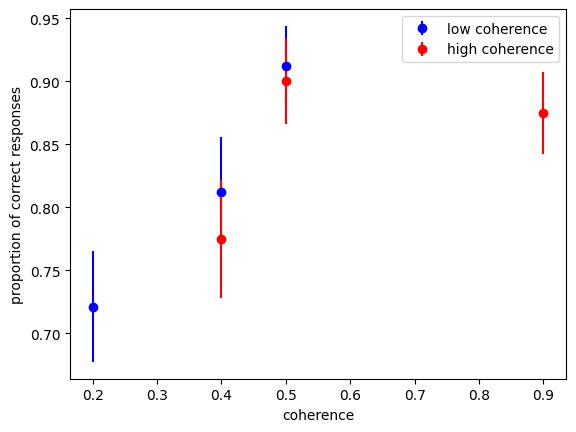

In [45]:
df_cond0_left = df_trials[(df_trials['condition']==0) & ((df_trials['correct_response']=='left') | (df_trials['correct_response']=='no_target'))]
df_cond1_left = df_trials[(df_trials['condition']==1) & ((df_trials['correct_response']=='left') | (df_trials['correct_response']=='no_target'))]

# df_cond0_left = df_trials[(df_trials['condition']==0) & ((df_trials['correct_response']=='left'))]
# df_cond1_left = df_trials[(df_trials['condition']==1) & ((df_trials['correct_response']=='left'))]

#use the function we defined above to compute the psychometric curve for this set of trials
mean_resp_low_contrast, sem_resp_low_contrast, low_contrast_unique = psycho_curve(df_cond0_left['is_correct'], df_cond0_left['coherence_left'])

#use the function we defined above to compute the psychometric curve for this set of trials
mean_resp_high_contrast, sem_resp_high_contrast, high_contrast_unique = psycho_curve(df_cond1_left['is_correct'], df_cond1_left['coherence_left'])

# 3. plot everything  (use option 'label=' to define a label for the legend)
plt.errorbar(low_contrast_unique ,mean_resp_low_contrast, yerr=sem_resp_low_contrast, fmt="bo", label="low coherence");
plt.errorbar(high_contrast_unique ,mean_resp_high_contrast, yerr=sem_resp_high_contrast, fmt="ro", label="high coherence");

plt.xlabel('coherence');
plt.ylabel('proportion of correct responses');
plt.legend();

Right

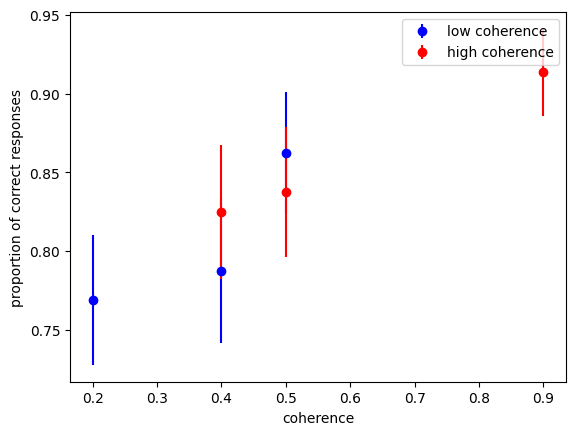

In [46]:
df_cond0_right = df_trials[(df_trials['condition']==0) & ((df_trials['correct_response']=='right') | (df_trials['correct_response']=='no_target'))]
df_cond1_right = df_trials[(df_trials['condition']==1) & ((df_trials['correct_response']=='right') | (df_trials['correct_response']=='no_target'))]

# df_cond0_right = df_trials[(df_trials['condition']==0) & ((df_trials['correct_response']=='right'))]
# df_cond1_right = df_trials[(df_trials['condition']==1) & ((df_trials['correct_response']=='right'))]

#use the function we defined above to compute the psychometric curve for this set of trials
mean_resp_low_contrast, sem_resp_low_contrast, low_contrast_unique = psycho_curve(df_cond1_right['is_correct'], df_cond1_right['coherence_right'])

#use the function we defined above to compute the psychometric curve for this set of trials
mean_resp_high_contrast, sem_resp_high_contrast, high_contrast_unique = psycho_curve(df_cond0_right['is_correct'], df_cond0_right['coherence_right'])

# 3. plot everything  (use option 'label=' to define a label for the legend)
plt.errorbar(low_contrast_unique ,mean_resp_low_contrast, yerr=sem_resp_low_contrast, fmt="bo", label="low coherence");
plt.errorbar(high_contrast_unique ,mean_resp_high_contrast, yerr=sem_resp_high_contrast, fmt="ro", label="high coherence");

plt.xlabel('coherence');
plt.ylabel('proportion of correct responses');
plt.legend();

RTs

Left

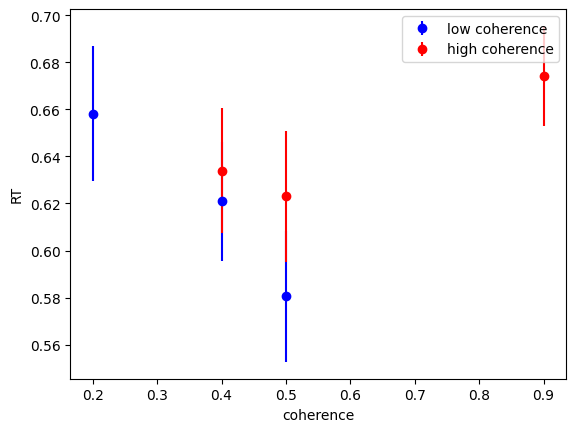

In [47]:
# remove trials where the participants had no response because there is no reaction time
df_trials_rt = df_trials[np.logical_not(df_trials.rt=='none')]

rt_low_contrast_left = df_trials_rt[(df_trials_rt.condition==0) & (df_trials_rt.correct_response=='left')].groupby('coherence_left', as_index=False)['rt'].agg(['mean','sem'])
rt_high_contrast_left = df_trials_rt[(df_trials_rt.condition==1) & (df_trials_rt.correct_response=='left')].groupby('coherence_left', as_index=False)['rt'].agg(['mean','sem'])

plt.errorbar(rt_low_contrast_left.coherence_left, rt_low_contrast_left['mean'], yerr=rt_low_contrast_left['sem'], fmt="bo", label="low coherence");
plt.errorbar(rt_high_contrast_left.coherence_left, rt_high_contrast_left['mean'], yerr=rt_high_contrast_left['sem'], fmt="ro", label="high coherence");

plt.xlabel('coherence');
plt.ylabel('RT');
plt.legend();


Right

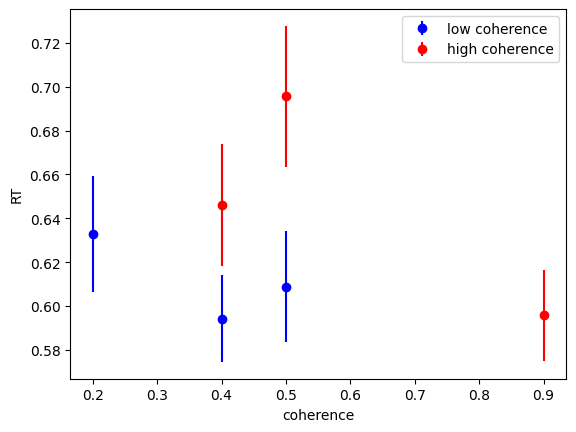

In [48]:
# remove trials where the participants had no response because there is no reaction time
df_trials_rt = df_trials[np.logical_not(df_trials.rt=='none')]

rt_low_coherence_right = df_trials_rt[(df_trials_rt.condition==1) & (df_trials_rt.correct_response=='right')].groupby('coherence_right', as_index=False)['rt'].agg(['mean','sem'])
rt_high_coherence_right = df_trials_rt[(df_trials_rt.condition==0) & (df_trials_rt.correct_response=='right')].groupby('coherence_right', as_index=False)['rt'].agg(['mean','sem'])

plt.errorbar(rt_low_coherence_right.coherence_right, rt_low_coherence_right['mean'], yerr=rt_low_coherence_right['sem'], fmt="bo", label="low coherence");
plt.errorbar(rt_high_coherence_right.coherence_right, rt_high_coherence_right['mean'], yerr=rt_high_coherence_right['sem'], fmt="ro", label="high coherence");

plt.xlabel('coherence');
plt.ylabel('RT');
plt.legend();

RT Distributions

In [ ]:
# remove trials where the participants had no response because there is no reaction time
df_trials_rt = df_trials[np.logical_not(df_trials.rt=='none')]

rt_low_contrast_left = df_trials_rt[(df_trials_rt.condition==0) & (df_trials_rt.correct_response=='left')].groupby('coherence_left', as_index=False)['rt'].agg(['mean','sem'])
rt_high_contrast_left = df_trials_rt[(df_trials_rt.condition==1) & (df_trials_rt.correct_response=='left')].groupby('coherence_left', as_index=False)['rt'].agg(['mean','sem'])

plt.errorbar(rt_low_contrast_left.coherence_left, rt_low_contrast_left['mean'], yerr=rt_low_contrast_left['sem'], fmt="bo", label="low coherence");
plt.errorbar(rt_high_contrast_left.coherence_left, rt_high_contrast_left['mean'], yerr=rt_high_contrast_left['sem'], fmt="ro", label="high coherence");

plt.xlabel('coherence');
plt.ylabel('RT');
plt.legend();